## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [48]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [49]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [50]:
row = df.shape[0]
print('The number of rows in this dataset is ' + str(row))

The number of rows in this dataset is 294478


c. The number of unique users in the dataset.

In [51]:
unique_user = df['user_id'].nunique()
print('The number of unique users in this dataset is ' +str(unique_user))

The number of unique users in this dataset is 290584


d. The proportion of users converted.

In [52]:
converted_user = df[df['converted'] == 1]['user_id'].nunique()/unique_user
print('The proportion of users converted is ' + str(converted_user))

The proportion of users converted is 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [53]:
#I split it into two possibilities that is when "treatment" lines up with "old_page" or "control" lines up with "new_page"
treatment_oldpage = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].shape[0]
control_newpage = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')].shape[0]

In [54]:
print("The number of times the `new_page` and `treatment` don't line up is " + str(treatment_oldpage + control_newpage))

The number of times the `new_page` and `treatment` don't line up is 3893


f. Do any of the rows have missing values?

In [55]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [56]:
print("There is no missing value in the data set.")

There is no missing value in the data set.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [57]:
#I drop a part of the data set where the exercise asked requirement doesn't meet.
drop_data = df[( (df['group'] == 'treatment') & 
                  (df['landing_page'] == 'old_page') ) | 
                ( (df['group'] == 'control') & 
                  (df['landing_page'] == 'new_page') ) ].index
df2 = df.drop(drop_data)

In [58]:
#Double check to see if all of the correct rows were deleted.
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [59]:
print('There are ' + str(df2['user_id'].nunique()) + ' unique user ids')

There are 290584 unique user ids


b. There is one **user_id** repeated in **df2**.  What is it?

In [60]:
repeated_id = str(df2[df2.duplicated('user_id')].user_id)[8:14]
print('The repeated user is is ' + repeated_id)

The repeated user is is 773192


c. What is the row information for the repeat **user_id**? 

In [61]:
df2[df2['user_id'] == int(repeated_id)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [62]:
#Drop the first element where the duplicated id was found
df2.drop([1899], inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [63]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [64]:
control_converted = df2[df2['group'] =='control'].converted.mean()
control_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [65]:
treatment_converted = df2[df2['group'] == 'treatment'].converted.mean()
treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [66]:
newpage_received = df2[df2['landing_page'] == 'new_page'].user_id.count()
newpage_received / df2.shape[0]

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**There is not enough evidence suggesting to a conclusion that one of these two page leads to more conversions.
However, ones cannot deny that the probability of converted user in control group is slightly higher that that of treatment group.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**We may split it into two situations:**
    * The Null hypothesis is H0: p_new - p_old <= 0
    (The users are more likely to receive old pages rather than new pages)
    * The Alternative hypothesis is H1: p_new - p_old > 0
    (The users are more likely to receive new pages rather than new pages)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [67]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [68]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [69]:
#Calculate the number of unique users who has got new page using df2 data frame
n_new = df2[df2['landing_page'] == 'new_page'].user_id.count()
n_new

145310

d. What is $n_{old}$?

In [70]:
#Calculate the number of unique users who has got old page using the data frame
n_old = df2[df2['landing_page'] =='old_page'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [71]:
#At this point, we are going to simulate n_new transactions with a convert rate of p_new under the null
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.11982657766155116

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [72]:
#Simulate n_old transactions with a convert rate of p_old under the null
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.12017291463028484

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [73]:
new_page_converted.mean() - old_page_converted.mean()

-0.00034633696873367925

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [74]:
#This part is for determining if the values will change if we use a larger data set (run the test 10000 times)
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p_old, n_old)
    new_page_converted = np.random.binomial(1, p_new, n_new)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

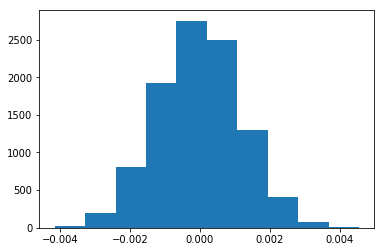

In [75]:
plt.hist(p_diffs);
#Now this is look like what I am expected. A very normal didtributed histogram

j. What proportion of the **p_diffs** are greater than the actual difference observed (actual_diffs) in **ab_data.csv**?

In [76]:
actual_diffs = treatment_converted - control_converted
print("Proportion of p_diffs greater than observed is " + str((p_diffs >actual_diffs).mean()))

Proportion of p_diffs greater than observed is 0.9023


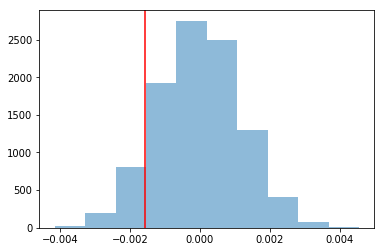

In [77]:
plt.hist(p_diffs, alpha=.5)
plt.axvline(x=actual_diffs, color='red');

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The histogram that we ploted is the sampling distribution of the null hypothesis. 
In this case, the conversion rate of the control group is equal to that of the treatment group.
Part j calculate how much proportion of the p_diffs array is greater the actual observed difference (actual_diffs) which is the difference between treatment_converted and control_converted group.
Since the calculated value is large at 90.2%, the null hypothesis is very likely to be true.
In conclusion, it is best for the company to keep the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [78]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [79]:
from scipy.stats import norm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('Z-score critical value (95% confidence) to ' \
      + 'reject the null: ' \
      + str(norm.ppf(1-(0.05/2))))
print('z_score = ' + str(z_score))
print('p_value = ' + str(p_value))

Z-score critical value (95% confidence) to reject the null: 1.95996398454
z_score = 1.31092419842
p_value = 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**By definition, the p-value is the probability of finding the observed, results when the null hypothesis (H0) of a study question is true. In this case, the p-value is greater than 0.05, then we are accept the Null hypothesis**

**The Z-score measures standard deviation, which is another test that helps us decide to reject the null or not. The value of the z-score of 1.31 falls within the range implied by the critical value of 1.96 (95% confidence), we fail to reject the null hypothesis. In other words, there is no statistical difference between the conversion rates for the control and treatment groups.**

**These 2 methods have the same result, providing a stronger evidence to conclude that our Null hypothesis is more likely to be true.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I will use Logistic Regression for this case. The goal is to predict 1 of 2 possible outcomes: Is the conversion rate of the user depends on the landing page.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [80]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [81]:
#Adding an 'intercept' column
df2['intercept'] = 1
#From 'group' column slit dummy data into two different column named 'control' and 'ab_group' which recognize 0 and 1 as its only value
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [82]:
#Dropping the newly created 'control' column, keeping the 'ab_page' as requested in part b.
df2.drop(['control'], axis = 1, inplace = True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [83]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        02:40:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The null hypothesis from part 2 is state that the probability of conversion for a user receiving the new pages is less than or equal to that of old pages. The alternative hypothesis from part 2 is that the probability of conversion for a user receiving the new page is greater than that of the old pages.**
**The p-value which returned from the previous z-score method was ~0.90.**

**The null hypothesis associated with the logistic regression state that there is no relationship between which page a user has got and the conversion rate. On the other hand, the alternative hypothesis assume that there is a relationship in between those variables.**
**The p-value of the ab_page in this regression model is 0.19.**

**These p-values differ from Part 2 because in the A/B test our null hypothesis states that the old page is better
than, or equal to, the new (It is a one-tailed test). On the other hand, The Logistic Regression is a two-tailed test therefore p-values have a different meaning relating to slope.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding more factors may make the model more predictive. It also results in boarder business suggestions compared to our simpler anlysis. For example, people from different age/countries may have different preference of how the website look, what style/colors should we use, then we may create different version that base on the ip locations or user profiles.**

**However, possible disadvantages of adding too many factors may include the risk of a too complicated model with too much input variables. To solve that, we need to identify which factors yeilds the most important effects as well as their contributed proportion in our finale result**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [85]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [86]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [87]:
# Create three dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [95]:
logit_mod_g = sm.Logit(df_new['converted'],df_new[['intercept', 'ab_page', 'US', 'UK']])
results_g = logit_mod_g.fit()
results_g.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        02:51:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [96]:
np.exp(0.0408), np.exp(0.0506)

(1.0416437559600236, 1.0519020483004984)

**In our case, Canada is being used as standard since it is the variable that is not included in the regression. As demostrated in the table, US users are 4% more likely to convert as Canadians users and UK users are 5% more likely to convert as Canadian users.**

**These numbers are not significant, it appear that country doesn't have much impact on the conversion**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [90]:
# These columns indicate that a given user received both the new page and lived in the country shown.
# It is where two required conditions are met.
df_new['CA_ab_page'] = df_new['ab_page']*df_new['CA']
df_new['UK_ab_page'] = df_new['ab_page']*df_new['UK']
df_new['US_ab_page'] = df_new['ab_page']*df_new['US']

In [91]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_ab_page,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [97]:
# Fit my Linear Model then obtain the new results
logit_mod_h = sm.Logit(df_new['converted'], df_new[['intercept', 'CA_ab_page', 'UK_ab_page']])
results_h = logit_mod_h.fit()
results_h.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Nov 2018   Pseudo R-squ.:               2.364e-05
Time:                        02:51:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_ab_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_ab_page     0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

In [99]:
1/np.exp(-0.0752), np.exp(0.0149)

(1.0780997492739288, 1.0150115583846535)

**In this case, the US become standard since its variable is not being used in the regression. For the treatment group (ab_page = 1), the probability of people receiving a new_page in CA is 1,078 less likely to convert. On the same condition. the UK's is 1,015 more likely to convert. However, these observed differences are quite small in number ***

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])